In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error as rmse

In [2]:
recovery_2d_100 = pd.read_csv('_Recovery_data/IE_2d_recovery_linear_100_02.csv', index_col=0)
recovery_3d_100 = pd.read_csv('_Recovery_data/IE_3d_recovery_linear_100_02.csv', index_col=0)
recovery_4d_100 = pd.read_csv('_Recovery_data/IE_4d_recovery_linear_100_02.csv', index_col=0)

recovery_2d_250 = pd.read_csv('_Recovery_data/IE_2d_recovery_linear_250_02.csv', index_col=0)
recovery_3d_250 = pd.read_csv('_Recovery_data/IE_3d_recovery_linear_250_02.csv', index_col=0)
recovery_4d_250 = pd.read_csv('_Recovery_data/IE_4d_recovery_linear_250_02.csv', index_col=0)

recovery_2d_500 = pd.read_csv('_Recovery_data/IE_2d_recovery_linear_500_02.csv', index_col=0)
recovery_3d_500 = pd.read_csv('_Recovery_data/IE_3d_recovery_linear_500_02.csv', index_col=0)
recovery_4d_500 = pd.read_csv('_Recovery_data/IE_4d_recovery_linear_500_02.csv', index_col=0)

recovery_2d_750 = pd.read_csv('_Recovery_data/IE_2d_recovery_linear_750_02.csv', index_col=0)
recovery_3d_750 = pd.read_csv('_Recovery_data/IE_3d_recovery_linear_750_02.csv', index_col=0)
recovery_4d_750 = pd.read_csv('_Recovery_data/IE_4d_recovery_linear_750_02.csv', index_col=0)

recovery_2d_1000 = pd.read_csv('_Recovery_data/IE_2d_recovery_linear_1000_02.csv', index_col=0)
recovery_3d_1000 = pd.read_csv('_Recovery_data/IE_3d_recovery_linear_1000_02.csv', index_col=0)
recovery_4d_1000 = pd.read_csv('_Recovery_data/IE_4d_recovery_linear_1000_02.csv', index_col=0)

recovery = {'2D': [recovery_2d_100, recovery_2d_250, recovery_2d_500, recovery_2d_750, recovery_2d_1000],
            '3D': [recovery_3d_100, recovery_3d_250, recovery_3d_500, recovery_3d_750, recovery_3d_1000],
            '4D': [recovery_4d_100, recovery_4d_250, recovery_4d_500, recovery_4d_750, recovery_4d_1000]}

mu_true = {'2D': [np.append([recovery['2D'][i]['mu1_true'], 
                             recovery['2D'][i]['mu2_true']], 0) for i in range(5)],
           '3D': [np.append([recovery['3D'][i]['mu1_true'], 
                             recovery['3D'][i]['mu2_true'], 
                             recovery['3D'][i]['mu3_true']], 0) for i in range(5)],
           '4D': [np.append([recovery['4D'][i]['mu1_true'], 
                             recovery['4D'][i]['mu2_true'], 
                             recovery['4D'][i]['mu3_true'],
                             recovery['4D'][i]['mu4_true']], 0) for i in range(5)]}

mu_estimate = {'2D': [np.append([recovery['2D'][i]['mu1_estimate'], 
                                 recovery['2D'][i]['mu2_estimate']], 0) for i in range(5)],
               '3D': [np.append([recovery['3D'][i]['mu1_estimate'], 
                                 recovery['3D'][i]['mu2_estimate'], 
                                 recovery['3D'][i]['mu3_estimate']], 0) for i in range(5)],
               '4D': [np.append([recovery['4D'][i]['mu1_estimate'], 
                                 recovery['4D'][i]['mu2_estimate'], 
                                 recovery['4D'][i]['mu3_estimate'],
                                 recovery['4D'][i]['mu4_estimate']], 0) for i in range(5)]}


color = {'2D': '#ffd166',
         '3D': '#ef476f',
         '4D': '#26547c'}

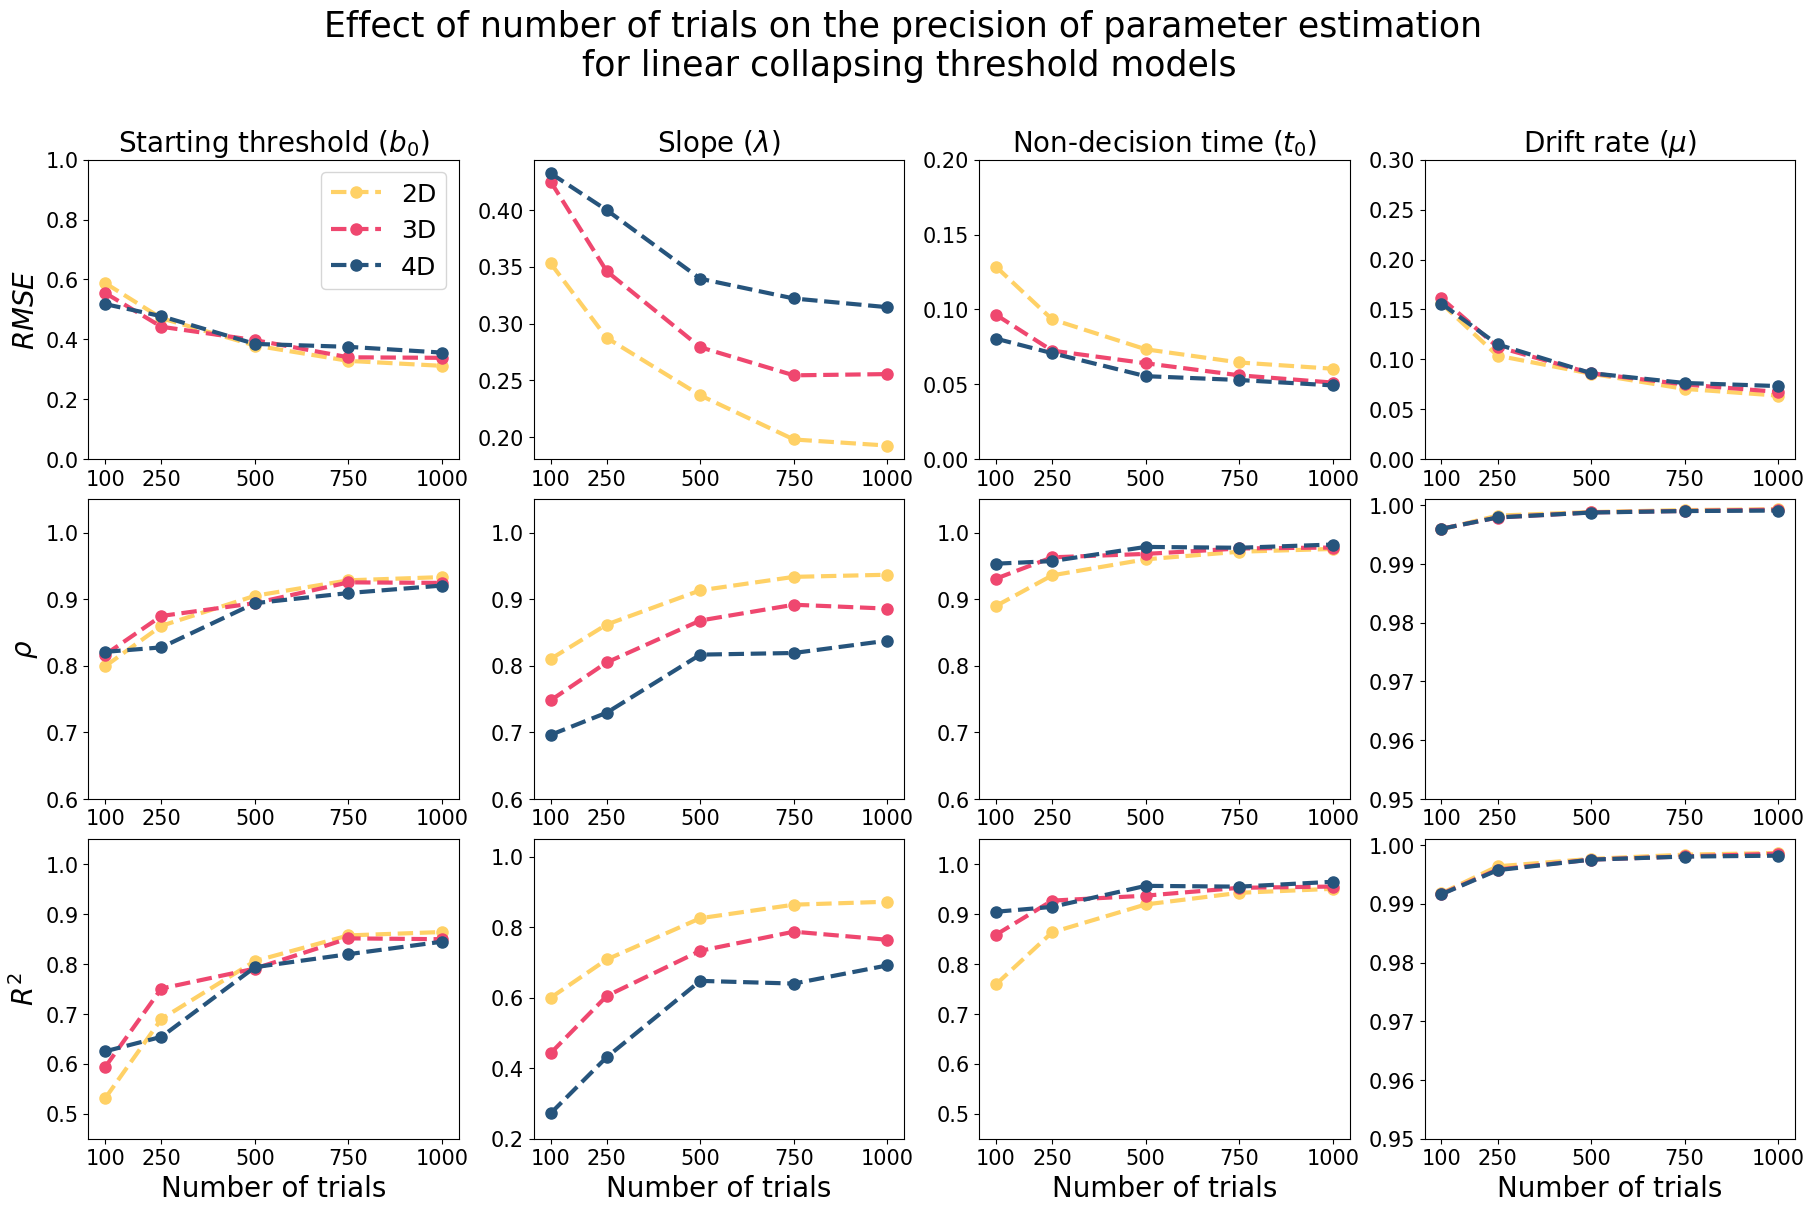

In [3]:
N_trials = [100, 250, 500, 750, 1000]
Dims = ['2D', '3D', '4D']

fig = plt.figure(figsize=(18, 12), layout='constrained')

fig.suptitle('Effect of number of trials on the precision of parameter estimation \nfor linear collapsing threshold models\n',
             fontsize=25)

# plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize

plt.subplot(3, 4, 1)
plt.ylim([0, 1])
prms = 'b0'
for dim in Dims:
    plt.plot(N_trials, 
             [rmse(recovery[dim][i]['{}_true'.format(prms)],
                   recovery[dim][i]['{}_estimate'.format(prms)]) for i in range(5)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.title('Starting threshold ($b_0$)')
plt.ylabel(r'$RMSE$')
plt.xticks(N_trials, N_trials)


plt.legend();

plt.subplot(3, 4, 2)
# plt.ylim([0, 0.2])
prms = 'lambda'
for dim in Dims:
    plt.plot(N_trials, 
             [rmse(recovery[dim][i]['{}_true'.format(prms)],
                   recovery[dim][i]['{}_estimate'.format(prms)]) for i in range(5)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.title('Slope ($\lambda$)')
plt.xticks(N_trials, N_trials)


plt.subplot(3, 4, 3)
plt.ylim([0, 0.2])
prms = 'ndt'
for dim in Dims:
    plt.plot(N_trials, 
             [rmse(recovery[dim][i]['{}_true'.format(prms)],
                   recovery[dim][i]['{}_estimate'.format(prms)]) for i in range(5)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.title('Non-decision time ($t_0$)')
plt.xticks(N_trials, N_trials)


plt.subplot(3, 4, 4)
plt.ylim([0, 0.3])
for dim in Dims:
    plt.plot(N_trials, 
             [rmse(mu_true[dim][i],mu_estimate[dim][i]) for i in range(5)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.title('Drift rate ($\mu$)')
plt.xticks(N_trials, N_trials)


# ############################## Correlation #########################
plt.subplot(3, 4, 5)
plt.ylim([0.6, 1.05])
prms = 'b0'
for dim in Dims:
    plt.plot(N_trials, 
             [pearsonr(recovery[dim][i]['{}_true'.format(prms)],
                   recovery[dim][i]['{}_estimate'.format(prms)])[0] for i in range(5)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.ylabel(r'$\rho$')
plt.xticks(N_trials, N_trials)

plt.subplot(3, 4, 6)
plt.ylim([0.6, 1.05])
prms = 'lambda'
for dim in Dims:
    plt.plot(N_trials, 
             [pearsonr(recovery[dim][i]['{}_true'.format(prms)],
                   recovery[dim][i]['{}_estimate'.format(prms)])[0] for i in range(5)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.xticks(N_trials, N_trials)

plt.subplot(3, 4, 7)
plt.ylim([0.6, 1.05])
prms = 'ndt'
for dim in Dims:
    plt.plot(N_trials, 
             [pearsonr(recovery[dim][i]['{}_true'.format(prms)],
                   recovery[dim][i]['{}_estimate'.format(prms)])[0] for i in range(5)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.xticks(N_trials, N_trials)

plt.subplot(3, 4, 8)
plt.ylim([0.95, 1.001])
for dim in Dims:
    plt.plot(N_trials, 
             [pearsonr(mu_true[dim][i],mu_estimate[dim][i])[0] for i in range(5)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.xticks(N_trials, N_trials)

# ##############################      R2     #########################
plt.subplot(3, 4, 9)
plt.ylim([0.45, 1.05])
prms = 'b0'
for dim in Dims:
    plt.plot(N_trials, 
             [r2_score(recovery[dim][i]['{}_true'.format(prms)],
                   recovery[dim][i]['{}_estimate'.format(prms)]) for i in range(5)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.ylabel(r'$R^2$')
plt.xlabel('Number of trials');
plt.xticks(N_trials, N_trials)

plt.subplot(3, 4, 10)
plt.ylim([0.2, 1.05])
prms = 'lambda'
for dim in Dims:
    plt.plot(N_trials, 
             [r2_score(recovery[dim][i]['{}_true'.format(prms)],
                   recovery[dim][i]['{}_estimate'.format(prms)]) for i in range(5)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.xlabel('Number of trials');
plt.xticks(N_trials, N_trials)

plt.subplot(3, 4, 11)
plt.ylim([0.45, 1.05])
prms = 'ndt'
for dim in Dims:
    plt.plot(N_trials, 
             [r2_score(recovery[dim][i]['{}_true'.format(prms)],
              recovery[dim][i]['{}_estimate'.format(prms)]) for i in range(5)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.xlabel('Number of trials');
plt.xticks(N_trials, N_trials)

plt.subplot(3, 4, 12)
plt.ylim([0.95, 1.001])
for dim in Dims:
    plt.plot(N_trials, 
             [r2_score(mu_true[dim][i],mu_estimate[dim][i]) for i in range(5)],
              '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.xlabel('Number of trials');
plt.xticks(N_trials, N_trials);

plt.savefig('../../_01_Figures/ntrial_collapsing.pdf', 
            transparent=True, 
            dpi=600, 
            bbox_inches='tight');